In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('white')

import os
import collections
import glob
from scipy.stats import pearsonr
import scipy.optimize
import scipy.stats

In [2]:
results = pd.DataFrame(pd.read_csv('../../Enrichment_Inference/20220723_enrichment_isogenic_corr_v2.csv',delimiter=','))

In [3]:
g = results.groupby(['antigen', 'shortname'])
results_merge = pd.DataFrame({
    'isogenic_enrich' : g.mean()['isogenic_enrich_avg'],
    'isogenic_enrich_err' : g.mean()['isogenic_enrich_sem'],
    'sortseq' : g['sortseq'].mean(),
    'sortseq_err' : g['sortseq_err'].mean()
})

results_merge

isogenic_enrich  isogenic_enrich_err    sortseq  \
antigen    shortname                                                    
MI15       germline             27.20                1.200   1.154494   
           somatic              99.85                0.025   3.119469   
SI06-G189D germline              2.62                0.325   1.640579   
           somatic              83.25                3.875  88.887879   

                      sortseq_err  
antigen    shortname               
MI15       germline      0.321792  
           somatic       1.319930  
SI06-G189D germline      1.196344  
           somatic       4.511150

0.4514782833901798


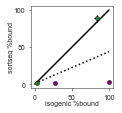

In [6]:
sns.set_style('ticks')
from matplotlib.ticker import FixedLocator, FixedFormatter
#sns.set_context('notebook')
plot_list = results_merge[~results_merge['sortseq'].isna()]
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
plt.figure(figsize=(1.5,1.5))
# x_locator = FixedLocator([6,7,8,9,10])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(plot_list['isogenic_enrich'], plot_list['sortseq'])
xs = np.array([0,100])
plt.plot(xs, xs, 'k-')
plt.plot(xs, slope*xs + intercept, 'k:')
corr, _ = pearsonr(plot_list['isogenic_enrich'], plot_list['sortseq'])

colordict = {'SI06-G189D':'forestgreen', 'MI15':'darkmagenta'}

for ag,color in colordict.items():
    to_plot = plot_list.loc[ag,:]
    plt.errorbar(x=to_plot['isogenic_enrich'],
                 y=to_plot['sortseq'],
                 xerr=to_plot['isogenic_enrich_err'],
                 yerr=to_plot['sortseq_err'],
                 linestyle='none',
                 linewidth=1,
                 marker='o',
                 markersize=4,
                 markeredgecolor='k',
                 markeredgewidth=0.5,
                 label=ag,
                 ecolor='k',
                color=color)
import scipy.stats
plt.xticks(ticks=[0,50,100],labels=['0','50','100'],fontsize=7)
plt.yticks(ticks=[0,50,100],labels=['0','50','100'],fontsize=7)
#plt.legend(fontsize=7,bbox_to_anchor=(0.5, 1.1), loc='right')
plt.tick_params(length=2.5,width=0.5)
#plt.legend(loc='best',fontsize=7)
plt.xlabel(r'isogenic %bound',fontsize=7,labelpad=0)
plt.ylabel(r'sortseq %bound',fontsize=7,labelpad=0)
#plt.title('r =  %.2f' % corr,fontsize=8,y=1)
#plt.title('CR9114, Comparison of Titeseq to isogenic measurement\n$R^2=%0.3f$' % r_value**2)
plt.axis('square')

plt.savefig('images/CH65_iso_enrich_validation.png',transparent=True, dpi=600,bbox_inches='tight')
print(corr)